In [2]:
# Import the necessary modules
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt




In [8]:
with open("val_acc_values.txt", "r") as f:
        val_acc_values=f.read()

with open("acc.txt", "r") as f:
        acc=f.read()   

with open("loss.txt", "r") as f:
        loss=f.read()

with open("val_loss.txt", "r") as f:
        val_loss=f.read()


In [9]:
val_acc_values = val_acc_values.replace('[', '')
val_acc_values = val_acc_values.replace(']', '')
val_acc_values = [float(val) for val in val_acc_values.split(',')]
acc = acc.replace('[', '')
acc = acc.replace(']', '')
acc = [float(val) for val in acc.split(',')]
loss = loss.replace('[', '')
loss = loss.replace(']', '')
loss = [float(val) for val in loss.split(',')]
val_loss = val_loss.replace('[', '')
val_loss = val_loss.replace(']', '')
val_loss = [float(val) for val in val_loss.split(',')]




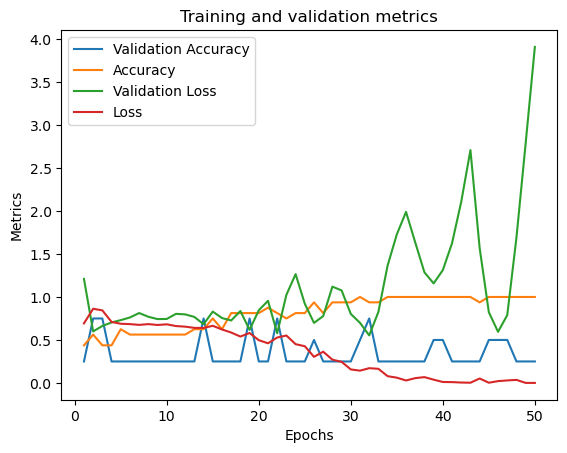

1/1 [==============================] - 0s 102ms/step
Frau:[[0.]]
1/1 [==============================] - 0s 21ms/step
Frau:[[0.]]
1/1 [==============================] - 0s 11ms/step
Frau:[[4.2604407e-35]]
1/1 [==============================] - 0s 32ms/step
Frau:[[6.4172227e-16]]
1/1 [==============================] - 0s 23ms/step
Mann:[[1.]]
1/1 [==============================] - 0s 21ms/step
Frau:[[0.]]
1/1 [==============================] - 0s 23ms/step
Mann:[[1.]]
1/1 [==============================] - 0s 30ms/step
Mann:[[1.]]
1/1 [==============================] - 0s 31ms/step
Mann:[[1.]]
1/1 [==============================] - 0s 18ms/step
Mann:[[1.]]
1/1 [==============================] - 0s 22ms/step
Mann:[[1.]]
1/1 [==============================] - 0s 28ms/step
Frau:[[0.]]
1/1 [==============================] - 0s 34ms/step
Frau:[[0.3895746]]
1/1 [==============================] - 0s 34ms/step
Frau:[[0.]]
1/1 [==============================] - 0s 25ms/step
Frau:[[0.]]
1/1 [=====

<Figure size 640x480 with 0 Axes>

In [26]:
# val_acc_values = sorted(val_acc_values, reverse=False)
local_test_path = "C:/Users/busse/Bachelorarbeit/CICD-Pipeline-Gender-Recognition/"
# Erstellen Sie das Diagramm
epochs = range(1, len(val_acc_values) + 1)

plt.plot(epochs, val_acc_values, label='Validation Accuracy')
plt.plot(epochs, acc, label='Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, loss, label='Loss')

plt.title('Training and validation metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()

plt.show()

plt.savefig("plot.png")

with open("n.txt", "r") as f:
    n = int(f.read())


df_test = pd.read_excel(f'model/excel_sheets/Gender_{n}.xlsx')

X_test = df_test['Images']

image_list = X_test.tolist()
model = load_model(f'model/saved_trained_Models/trained_{n}_model.h5')

counter = 0
for image in image_list:

    img = load_img(image, target_size=(178, 218), color_mode="grayscale")

    img_array = img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    if predictions[0] < 0.5:
        print(f'Frau:{predictions}')
    else:
        print(f'Mann:{predictions}')
